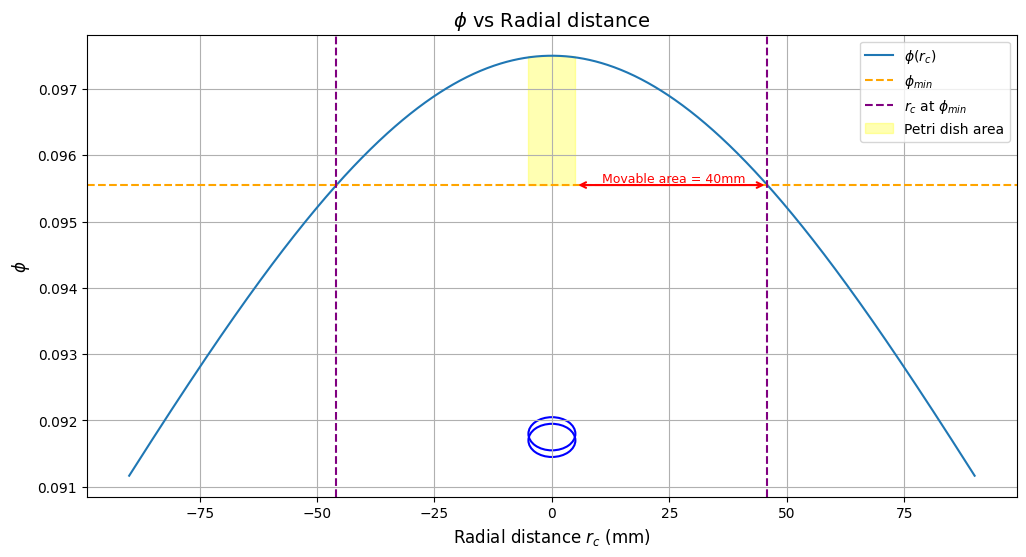

40.871733439977895

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from matplotlib.patches import Ellipse

# Constants given in the problem
phi_active = 0.054
phi_passive = 0.0975
phi_min = 0.09555
h = 148  # height in mm

# Function to calculate I_p
def calculate_I_p(r_c, h):
    return 1 / np.sqrt(1 + (r_c/h)**2)

# Function to interpolate phi between phi_active and phi_passive based on I_p
def calculate_phi(I_p, phi_active, phi_passive):
    return phi_active + (phi_passive - phi_active) * I_p

# Function to find the root for phi_min
def phi_difference(r_c, phi_min, phi_active, phi_passive, h):
    # Use absolute value of r_c for the calculation due to symmetry
    I_p = calculate_I_p(abs(r_c), h)
    phi = calculate_phi(I_p, phi_active, phi_passive)
    return phi - phi_min

# Find the r_c value where phi equals phi_min using the root_scalar function
# Since we're considering absolute values, we look for the root in the positive range
sol = root_scalar(phi_difference, args=(phi_min, phi_active, phi_passive, h), bracket=[0, 50])

# Generate the plot data
r_c = np.linspace(-90, 90, 1000)  # Range from -100 mm to 100 mm
I_p = calculate_I_p(r_c, h)
phi_values = calculate_phi(I_p, phi_active, phi_passive)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(r_c, phi_values, label=r'$\phi(r_c)$')
plt.axhline(y=phi_min, color='orange', linestyle='--', label=r'$\phi_{min}$')
plt.axvline(x=sol.root, color='purple', linestyle='--', label=r'$r_c$ at $\phi_{min}$')
plt.axvline(x=-sol.root, color='purple', linestyle='--')  # Symmetric point at -r_c
petri_dish_area_min = -5
petri_dish_area_max = 5
plt.fill_betweenx([phi_min, phi_passive], petri_dish_area_min, petri_dish_area_max, color='yellow', alpha=0.3, label='Petri dish area')
movable_area_start = 5  # Edge of the Petri dish area in mm
movable_area_end = sol.root  # r_c at phi_min, calculated from your code

# The arrow starts at the edge of the Petri dish and ends at r_c at phi_min
plt.annotate(text='', xy=(movable_area_end, phi_min), xytext=(movable_area_start, phi_min),
             arrowprops=dict(arrowstyle='<->', lw=1.5, color='red'))

# Add text to the arrow
plt.text((movable_area_start + movable_area_end) / 2, phi_min, ' Movable area = 40mm',
         verticalalignment='bottom', horizontalalignment='center', color='red', fontsize=9)
# Add an Ellipse to represent the Petri dish
# Assuming the center is at (0, phi_passive) and the width of the Petri dish is 20mm (for the diameter)
petri_dish = Ellipse(xy=(0, phi_passive - 0.0057), width=10, height=0.001/2, edgecolor='blue', facecolor='none', lw=1.5)
petri_dish2 = Ellipse(xy=(0, phi_passive - 0.0058), width=10, height=0.001/2, edgecolor='blue', facecolor='none', lw=1.5)

# Get the current Axes instance on which to add the Ellipse
ax = plt.gca()  # Get current axes
ax.add_patch(petri_dish)
ax.add_patch(petri_dish2)

plt.xlabel(r'Radial distance $r_c$ (mm)', fontsize=12)
plt.ylabel(r'$\phi$', fontsize=12)
plt.title(r'$\phi$ vs Radial distance', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Calculate and output the difference between the 10mm of the petri dish and the r at phi_min
difference_from_edge_to_phi_min = abs(sol.root) - 5
difference_from_edge_to_phi_min



In [4]:
import numpy as np

# Constants
k = 1  # You would adjust this based on your specific conditions or leave it as 1 for a normalized case

# Function to calculate dl/dphi
def calculate_dl_dphi(phi, k):
    # Ensure phi is not zero to avoid division by zero
    if phi <= 0:
        return np.inf  # Indicate that dl/dphi approaches infinity as phi approaches 0
    dl_dphi = -0.5 * (k**(0.5)) * (phi**(-1.5))
    return dl_dphi

# Example calculation at phi = 12,000 lux (midway between active and passive states)
phi_example = 12000
dl_dphi_example = calculate_dl_dphi(phi_example, k)

print(f"The rate of change of distance with respect to illumination intensity (dl/dphi) at phi = {phi_example} lux is: {dl_dphi_example} mm per lux")


The rate of change of distance with respect to illumination intensity (dl/dphi) at phi = 12000 lux is: -3.8036288715636534e-07 mm per lux
